# Solving the Regression Problem - Weight Prediction

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем и смотрим на структуру датасета
df = pd.read_csv('gender-weight_pounds-height_inches.csv')
df.head()

,Gender,Height,Weight
0,Male,74.0,242.0
1,Male,69.0,162.0
2,Male,74.0,213.0
3,Male,72.0,220.0
4,Male,70.0,206.0


In [2]:
# Размер таблицы
df.shape

(10000, 3)

In [3]:
# Информация о столбах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
# Посмотрим основные статистические показатели
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,10000,2,Male,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height,10000.0,NaN,NaN,NaN,66.3674,3.852675,54.0,64.0,66.0,69.0,79.0
Weight,10000.0,NaN,NaN,NaN,161.4412,32.10714,65.0,136.0,161.0,187.0,270.0


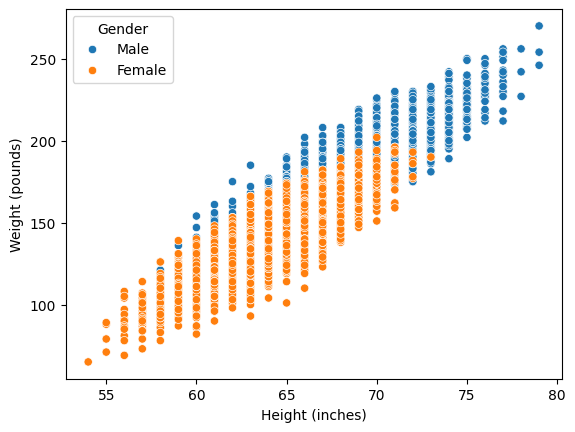

In [5]:
# Построим точечный график для определения линейной связи между ростом и весом людей
sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['Gender'])
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.show()

In [6]:
# Переводим дюймы в сантиметры
df['Height_cm']=round(2.54*df['Height'], 1)

# и фунты в килограммы
df['Weight_kg']=round(df['Weight']/2.20462, 1)

# Кодируем пол в числовой признак
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

df.head()

,Gender,Height,Weight,Height_cm,Weight_kg
0,1,74.0,242.0,188.0,109.8
1,1,69.0,162.0,175.3,73.5
2,1,74.0,213.0,188.0,96.6
3,1,72.0,220.0,182.9,99.8
4,1,70.0,206.0,177.8,93.4


In [7]:
# Разделение на обучающий и тестовый наборы
X = df[['Gender', 'Height_cm']].values
y = df['Weight_kg'].values

import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [8]:
# Используем StandardScaler для приведения признаков к одной шкале
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Обучение модели линейной регрессии
import sklearn.linear_model as lm
model = lm.LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
model.intercept_ # b0

73.04745714285752

In [11]:
model.coef_ # b1-b2

array([ 4.47790174, 10.31009711])

In [12]:
# Определим коэффициент детерминации R^2
print(f"Train R^2: {model.score(X_train_scaled, y_train):.2%}")
print(f"Test R^2: {model.score(X_test_scaled, y_test):.2%}")

Train R^2: 89.89%
Test R^2: 90.05%


In [13]:
# Найдем предсказания модели для обучающих и тестовых данных
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [14]:
# Найдем величину ошибки MSE тренировочной и тестовой выборок:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Train MSE: 4.617289889118358
Test MSE: 4.6205260927388485


In [15]:
# Преобразование новых данных
new_data = np.array([[0, 169],  # Женщина, 169 см
                     [1, 190]])  # Мужчина, 190 см

new_data_scaled = scaler.transform(new_data)

In [16]:
# Предсказание веса для новых данных
pred_weight_new_data = model.predict(new_data_scaled)
print(f"Вес женщины (169см): {round(pred_weight_new_data[0],1)}кг")
print(f"Вес мужчины (190см): {round(pred_weight_new_data[1],1)}кг")

Вес женщины (169см): 69.2кг
Вес мужчины (190см): 100.3кг


In [17]:
# Попробуем теперь натренировать модель Дерево Решений:
import sklearn.tree as st

tree_reg_model = st.DecisionTreeRegressor()
tree_reg_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
# Найдем предсказания модели для обучающих и тестовых данных для модели Дерево Решений:
y_train_pred_dt = tree_reg_model.predict(X_train)
y_test_pred_dt = tree_reg_model.predict(X_test)

In [19]:
# Найдем величину ошибки MSE тренировочной и тестовой выборок для модели Дерево Решений:
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt, squared=False)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt, squared=False)

print(f"Train MSE for DT model: {train_mse_dt}")
print(f"Test MSE for DT model: {test_mse_dt}")

Train MSE for DT model: 4.6044593286979705
Test MSE for DT model: 4.648876692203432


In [25]:
# Определим коэффициент детерминации R^2 для модели Дерево Решений:
print(f"Train R^2 for DT model: {tree_reg_model.score(X_train, y_train):.2%}")
print(f"Test R^2 for DT model: {tree_reg_model.score(X_test, y_test):.2%}")

Train R^2 for DT model: 89.95%
Test R^2 for DT model: 89.93%


In [21]:
# Предсказание веса для новых данных по модели Дерево Решений:
pred_weight_new_data_dt = tree_reg_model.predict(new_data)
print(f"Вес женщины (169см): {round(pred_weight_new_data_dt[0],1)}кг")
print(f"Вес мужчины (190см): {round(pred_weight_new_data_dt[1],1)}кг")

Вес женщины (169см): 70.5кг
Вес мужчины (190см): 100.9кг


Сравнивая величины ошибок и коэффициентов детерминации моделей линейной регрессии и дерева решении, мы видим, что предсказания не стали лучше.

In [22]:
# Попробуем теперь натренировать модель Случайный Лес:
import sklearn.ensemble as se

forest_reg_model = se.RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Найдем предсказания модели для обучающих и тестовых данных для модели Случайный Лес:
y_train_pred_rf = forest_reg_model.predict(X_train)
y_test_pred_rf = forest_reg_model.predict(X_test)

In [24]:
# Найдем величину ошибки MSE тренировочной и тестовой выборок для модели Случайный Лес:
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)

print(f"Train MSE for RF model: {train_mse_rf}")
print(f"Test MSE for RF model: {test_mse_rf}")

Train MSE for RF model: 4.6049249076684635
Test MSE for RF model: 4.647492672470225


In [26]:
# Определим коэффициент детерминации R^2 для модели Случайный Лес:
print(f"Train R^2 for RF model: {forest_reg_model.score(X_train, y_train):.2%}")
print(f"Test R^2 for RF model: {forest_reg_model.score(X_test, y_test):.2%}")

Train R^2 for RF model: 89.95%
Test R^2 for RF model: 89.93%


In [27]:
# Предсказание веса для новых данных по модели Случайный Лес:
pred_weight_new_data_rf = forest_reg_model.predict(new_data)
print(f"Вес женщины (169см): {round(pred_weight_new_data_rf[0],1)}кг")
print(f"Вес мужчины (190см): {round(pred_weight_new_data_rf[1],1)}кг")

Вес женщины (169см): 70.4кг
Вес мужчины (190см): 101.0кг


Сравнивая величины ошибок и коэффициентов детерминации моделей линейной регрессии и случайный лес, мы видим, что предсказания не стали лучше.

**Из сравнения производительности разных алгоритмов регрессоров можно вывести следующие предположения:**
* Eсли взаимосвязь между признаками и целевой переменной приблизительно линейна, то линейная регрессия может быть достаточно эффективной для прогнозирования веса, что объясняет схожие результаты с моделями дерева решении и случайного леса.
* Скорее всего модели Дерево решений и Случайный лес могут оказаться избыточными для простых отношений в данных, и линейная регрессия является достаточной для описания таких отношений.
* Модели, которые рассмотрены, показывают схожую производительность, так как возможно есть другие факторы, не учтенные в модели (например, образ жизни, метаболизм и т. д.), которые оказывают более существенное влияние на вес.